In [201]:
##########    DATA MINING    ##########

In [202]:
# We are going to use pandas to do the data mining
# The paths can be generalized using os but this is a simple notebook so I write them by hand
import pandas as pd
import numpy as np
path_amazon = "/home/alejo/Desktop/Cien/Cien_DS_Test/amazon_labelled.txt"
path_imdb = "/home/alejo/Desktop/Cien/Cien_DS_Test/imdb_labelled.txt"
path_yelp = "/home/alejo/Desktop/Cien/Cien_DS_Test/yelp_labelled.txt"

In [203]:
df_amazon = pd.read_csv(path_amazon, sep="\t", header=None)
df_imdb = pd.read_csv(path_imdb, sep="\t", header=None)
df_yelp = pd.read_csv(path_yelp, sep="\t", header=None)

In [204]:
df_amazon.rename(columns={0: "sentence", 1:"score"}, inplace=True)
df_imdb.rename(columns={0: "sentence", 1:"score"}, inplace=True)
df_yelp.rename(columns={0: "sentence", 1:"score"}, inplace=True)

In [205]:
# This cell has been run with the three initial Data sources.
# The three are close to mu=std=0.5 and already cleaned, no Nans, empty values, 
# HTML markups or others.
# It is a English corpus
print(df_amazon.shape)
print(df_amazon.describe())
print(df_amazon.info())
print(df_amazon.head(3))
print(df_amazon["score"].unique())
print(df_amazon["score"].value_counts())

(1000, 2)
            score
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   score     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
                                            sentence  score
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
[0 1]
1    500
0    500
Name: score, dtype: int64


In [206]:
# We can see that a few of the entries contain paragraphs or many sentences
[(i,df_imdb["sentence"].iloc[i].count(".")) for i in range(df_imdb.shape[0])]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 4),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 67),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 0),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 0),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 0),
 (64, 0),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 2),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 0),
 (92, 0),
 (93, 1),
 (94, 0),
 (95, 0),
 (96, 0),
 (97, 1),
 (98, 1),
 (99, 0),
 (100, 1)

In [207]:
# In fact, I took a look to each one of the sources and the imdb's one is not correctly readen by the read_csv method
# There is more 200 of difference between the num of rows and the num of samples in the .txt

In [208]:
# let's take a look to those with more of one dot
# They are mainly a few sentences from the same sample, but some of them come from the reading problem
list = [df_imdb["sentence"].iloc[i] for i in range(df_imdb.shape[0]) if df_imdb["sentence"].iloc[i].count(".")>=2]
#list[0:5]

In [209]:
misreads = [df_imdb["sentence"].iloc[i] for i in range(df_imdb.shape[0]) if "\t" in df_imdb["sentence"].iloc[i]]
misreads_indexes = [index for index in range(df_imdb.shape[0]) if "\t" in df_imdb["sentence"].iloc[index]]
misreads_scores = df_imdb["score"].iloc[misreads_indexes].tolist()

In [210]:
# We extract the samples which were bad collected, create two DF with them, and append them to the main one
# The data without "\t\d" are clearly those at the end, the misreads. That's why we saved the scores
# We extract the sentence splitting into positive, negative and misreads
positive = []
negative = []
misreads_ends = []
for entry in misreads:
    split = entry.split('\n')
    for sample in split:
        if len(sample)==0:
            pass
        elif sample[-1]=="1":
            positive.append(sample[:-1])
        elif sample[-1]=="0":
            negative.append(sample[:-1])
        else:
            misreads_ends.append(sample[:-1])

In [211]:
# We create the data Frames with the data
new_df_positive = pd.DataFrame(data = {"sentence" : positive ,"score": [1] * len(positive)})
new_df_negative = pd.DataFrame(data = {"sentence" : negative ,"score": [0] * len(negative)})
new_df_misreads = pd.DataFrame(data = {"sentence" : misreads_ends ,"score": misreads_scores})

# We append the dataframes. We are going to shuffle below so we do not care about the order
new_df = new_df_negative.append(new_df_positive, ignore_index=True).append(new_df_misreads, ignore_index=True)
df_imdb.drop(index=misreads_indexes, inplace=True)
df_imdb = df_imdb.append(new_df, ignore_index=True)

In [212]:
df = df_amazon.append(df_imdb, ignore_index=True).append(df_yelp, ignore_index=True)

In [213]:
from sklearn.utils import shuffle
df = shuffle(df)

In [214]:
##########    WORDCLOUDS    ##########

In [215]:
# The following lines are mainly because by experience splitting like this gave me better accuracy
# and the data set is not so big. Moreover, 
# It is a good point to take a look to the difference between 0 and 1.
# This could be done faster with: 
# from sklearn.cross_validation import train_test_split
grouped = df.groupby(by=["score"])
df_pos = grouped.get_group(1)
df_neg = grouped.get_group(0)

In [216]:
# Let's take a look to the positive and negative sets.
# They may appear words like "good" or "great" in positive and "deception" or "sadly" in the negative.
# Let's see the most common words 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(serie):
    """
    Input: pandas serie
    Output: None, just printting the wordcloud with the size based on the frequence
    """
    # These stop words come already with the library we could also extract them from the serie
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords).generate(" ".join([i for i in serie.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

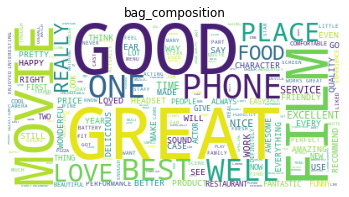

In [217]:
wordcloud(df_pos["sentence"])

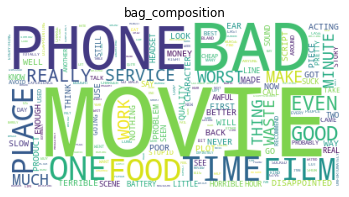

In [218]:
wordcloud(df_neg["sentence"])

In [219]:
# The wordclouds make sence 
# but it is remarkable that since part of the data comes from a movie's website
# some of the most common words are "film" and "movie".
# If I have after doing the NN I could try solve this.
# It depends of the goal of the project, 
# if it's for this websites or a general one and this is the available data
# One option is to use word matcher to replace by neutral value, or the NER option of SpaCY to replace them.
# Anyway those words are in both (0 and 1) so it will not affect to our test and train sets, they aren't going to have so much weight.
# But it could affect a bit to the application of the model to other general settings

In [220]:
##########    SPLITING DATA SETS    ##########

In [221]:
# Get the train sets
train_pos = df_pos.sample(frac = 0.8, axis=0)
train_neg = df_neg.sample(frac = 0.8, axis=0)
# getting their indexes and creating filters
list_pos_train = train_pos.index.tolist()
list_neg_train = train_neg.index.tolist()
filter_pos = df_pos.index.isin(list_pos_train)
filter_neg = df_neg.index.isin(list_neg_train)
# take as test the complementaries
test_pos = df_pos.loc[~filter_pos]
test_neg = df_neg.loc[~filter_neg]
# We join again the data sets
train = train_pos.append(train_neg, ignore_index = True)
test = test_pos.append(test_neg, ignore_index = True)

In [222]:
# The faster option would be to use CountVectorizer or TfidfVectorizer 
# from sklearn but the vocabulary is created from the corpus 
# and the vectorarization of the tokens comes from that vocabulary
# We are going to use the trained word2vector from spaCy with a 300 features vector per token.

In [223]:
import en_core_web_md
from spacy import displacy
nlp = en_core_web_md.load()

In [224]:
# Let's play a bit with SpaCy
# displacy.render(example)
# RMK: We use a different model for wordclouds so the STOP words do not need to be the same
example = nlp(df.iloc[100,0])
[(x, x.pos_ ,x.is_stop) for x in example]

[(We, 'PRON', True),
 (had, 'AUX', True),
 (7, 'NUM', False),
 (at, 'ADP', True),
 (our, 'DET', True),
 (table, 'NOUN', False),
 (and, 'CCONJ', True),
 (the, 'DET', True),
 (service, 'NOUN', False),
 (was, 'AUX', True),
 (pretty, 'ADV', False),
 (fast, 'ADV', False),
 (., 'PUNCT', False)]

In [225]:
# word enbedding example
# example[4].vector

In [226]:
# Now, using Spacy we extract the necessary parameters
vocab_size = len(nlp.vocab)
embedding_vector_length = 300
max_length = 200
nlp.add_pipe(nlp.create_pipe("sentencizer"))

In [227]:
embeddings = nlp.vocab.vectors.data

In [228]:
# The following functions are from the spacy library to preprocess the data
# 
def get_features(docs, max_length):
    # docs = list(docs)
    X = np.zeros((len(docs), max_length), dtype="int32")
    for i, doc in enumerate(docs):
        j = 0
        for token in doc:
            vector_id = token.vocab.vectors.find(key=token.orth)
            if vector_id >= 0:
                X[i, j] = vector_id
            else:
                X[i, j] = 0
            j += 1
            if j >= max_length:
                break
    return X

In [229]:
def get_labelled_sentences(docs, doc_labels):
    labels = []
    sentences = []
    for doc, y in zip(docs, doc_labels):
        for sent in doc.sents:
            sentences.append(sent)
            labels.append(y)
    return sentences, np.asarray(labels, dtype="int32")

In [230]:
# I don't know why but train_text = list(nlp.pipe(train["sentence"])) is not working, 
# even it is common and faster way to this cell
train_text = [nlp(text) for text in train["sentence"]]
test_text = [nlp(text) for text in test["sentence"]]

In [231]:
type(train_text)

list

In [232]:
train_text, train_labels = get_labelled_sentences(train_text, train["score"])
test_text, test_labels = get_labelled_sentences(test_text, test["score"])

In [233]:
type(train_text)

list

In [234]:
X_train = get_features(train_text, max_length)
X_test= get_features(test_text, max_length)

In [235]:
####################       Model       ####################
# Taking a look to the paper from where it was taken the data set we can see 
# that the point is the Loss function.
# The rest of the structure is a common CNN with blocks Conv-Pool and Sthocastic DG.
# In fact it is from 2015, when the Restnets were starting yet.
# My initial try was a CNN but I switched to a much more smaller LSTM NN. 

In [236]:
# Libraries for DL
import tensorflow as tf
from tensorflow import keras
import keras
from keras import backend as K # For the F1 score

In [237]:
################### METRICS: Recall, Precision, F1 Score ####################
# This cell has been copied from my old code
def recall_m(Y_true, Y_pred):
    true_positives = K.sum(K.round(K.clip(Y_true * Y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(Y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(Y_true, Y_pred):
    true_positives = K.sum(K.round(K.clip(Y_true * Y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(Y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(Y_true, Y_pred):
    precision = precision_m(Y_true, Y_pred)
    recall = recall_m(Y_true, Y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [238]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(embeddings.shape[0], embeddings.shape[1], input_length=max_length,
                                    trainable=False, weights=[embeddings], mask_zero=True))
model.add(tf.keras.layers.SpatialDropout1D(0.25))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, dropout=0.3, recurrent_dropout=0.3)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(50, activation='elu'))
model.add(tf.keras.layers.Dense(25, activation='elu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [239]:
# In the original model they use a different loss function. We take the most common for a binary classification
# adams (mix of momentum and RMSProp) for the optimizer.
# Since we do not know the goal of the classifier we are going to calculate the 4 most common measures
model.compile(loss='binary_crossentropy', optimizer='adam',
               metrics=['acc',f1_m, precision_m, recall_m])

In [240]:
# Model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 300)          6000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 300)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               140400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [241]:
# Model's check point
import datetime
import os
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

timestr = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
name = 'Sentiment_classifier_res_net_-' + timestr

checkpoint_path = "/home/alejo/Desktop/Cien/Cien_DS_Test/checkpoints/"+name+"/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.system('mkdir {}'.format(checkpoint_dir))

# save model after each epoch
cp_callback = ModelCheckpoint(filepath = checkpoint_path, verbose=1)

tensorboard_callback = TensorBoard(log_dir = 'tensorboard_logs/'+name, histogram_freq=1)

In [242]:
# Training and plotting
history = model.fit(X_train, train_labels,epochs=10, verbose=1, validation_data=(X_test, test_labels),
                    batch_size=128, callbacks=[cp_callback, tensorboard_callback])

Epoch 1/10
28/28 [==============================] - ETA: 0s - loss: 0.6239 - acc: 0.6352 - f1_m: 0.6189 - precision_m: 0.6642 - recall_m: 0.6197
Epoch 00001: saving model to /home/alejo/Desktop/Cien/Cien_DS_Test/checkpoints/Sentiment_classifier_res_net_-20200918-174314/cp-0001.ckpt
INFO:tensorflow:Assets written to: /home/alejo/Desktop/Cien/Cien_DS_Test/checkpoints/Sentiment_classifier_res_net_-20200918-174314/cp-0001.ckpt/assets
28/28 [==============================] - 41s 1s/step - loss: 0.6239 - acc: 0.6352 - f1_m: 0.6189 - precision_m: 0.6642 - recall_m: 0.6197 - val_loss: 0.5517 - val_acc: 0.6847 - val_f1_m: 0.3756 - val_precision_m: 0.5420 - val_recall_m: 0.2903
Epoch 2/10
28/28 [==============================] - ETA: 0s - loss: 0.5301 - acc: 0.7100 - f1_m: 0.6578 - precision_m: 0.7877 - recall_m: 0.5728
Epoch 00002: saving model to /home/alejo/Desktop/Cien/Cien_DS_Test/checkpoints/Sentiment_classifier_res_net_-20200918-174314/cp-0002.ckpt
INFO:tensorflow:Assets written to: /home

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


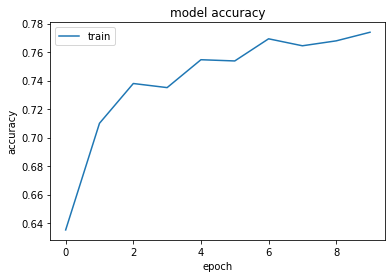

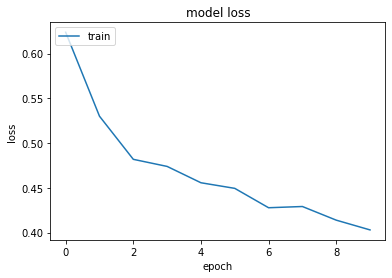

In [243]:
import matplotlib.pyplot as plt
# We summarize the history for accuracy
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# We summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()